In [4]:
import pandas as pd
df = pd.read_csv("feedback_values.csv")
print(df.head())


   ID             Category                                           Feedback  \
0   1           Sanitation            Public toilets need better maintenance.   
1   2  Road Infrastructure                Potholes on highways are dangerous.   
2   3     Digital Services  Government websites often crash during peak ho...   
3   4         Water Supply  There should be more awareness about water con...   
4   5            Education              Public libraries need better funding.   

  Sentiment        Date  
0  Negative  08-09-2023  
1  Negative  08-01-2023  
2  Negative  11-11-2024  
3   Neutral  23-06-2024  
4  Positive  13-08-2024  


# handling missing values

In [5]:
print(df.isnull().sum())
df.dropna(subset=["Feedback"],inplace=True)

ID           0
Category     0
Feedback     0
Sentiment    0
Date         0
dtype: int64


# clean the feedback txt

In [10]:
import re
def clean_text(text):
    text=text.lower()
    text=re.sub(r'[^\w\s]', '',text)
    text=re.sub(r'\d+','',text)
    text=text.strip()
    return text
df["cleaned_feedback"]=df["Feedback"].apply(clean_text)
df.to_csv("feedback_values_cleaned.csv",index=False)
print("cleaned dataset saved as'feedback_value_cleaned.csv'")

cleaned dataset saved as'feedback_value_cleaned.csv'


In [6]:
print(df[["Feedback","cleaned_feedback"]].head())

                                            Feedback  \
0            Public toilets need better maintenance.   
1                Potholes on highways are dangerous.   
2  Government websites often crash during peak ho...   
3  There should be more awareness about water con...   
4              Public libraries need better funding.   

                                    cleaned_feedback  
0             public toilets need better maintenance  
1                 potholes on highways are dangerous  
2  government websites often crash during peak hours  
3  there should be more awareness about water con...  
4               public libraries need better funding  


# encode sentiment labels

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["sentiment_label"]=le.fit_transform(df["Sentiment"])
print(dict(zip(le.classes_,le.transform(le.classes_))))

{'Negative': 0, 'Neutral': 1, 'Positive': 2}


In [16]:
X = df["cleaned_feedback"]
y = df["Sentiment"]


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define features and labels
X = df["cleaned_feedback"]
y = df["Sentiment"]  # <-- make sure this column exists (e.g., sentiment, category, etc.)

# Vectorize the text
vectorizer = TfidfVectorizer(max_features=500)
X_vectorized = vectorizer.fit_transform(X)


In [24]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier()
}

In [25]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {"Accuracy": acc, "F1 Score": f1}
    print(f"\n{name}")
    print("Accuracy:", acc)
    print("F1 Score:", f1)


Logistic Regression
Accuracy: 0.26666666666666666
F1 Score: 0.23825298994790522

Support Vector Machine
Accuracy: 0.25
F1 Score: 0.21213089127678691

Random Forest
Accuracy: 0.31666666666666665
F1 Score: 0.2978632478632479


# save the best model

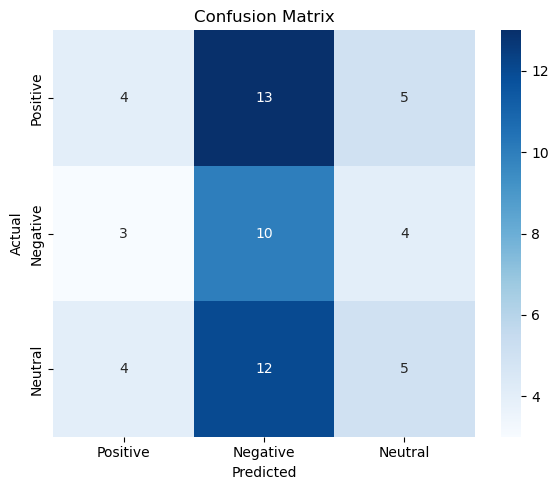

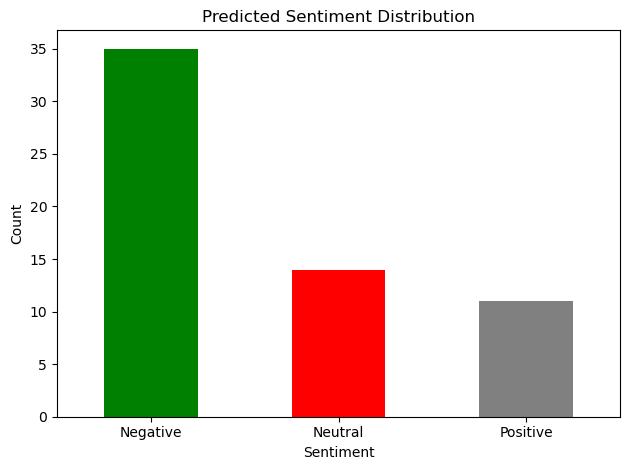

Classification Report:
               precision    recall  f1-score   support

    Negative       0.29      0.59      0.38        17
     Neutral       0.36      0.24      0.29        21
    Positive       0.36      0.18      0.24        22

    accuracy                           0.32        60
   macro avg       0.34      0.34      0.30        60
weighted avg       0.34      0.32      0.30        60


 Model, plots, and predictions saved!


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import joblib

best_model = models["Random Forest"]
y_pred = best_model.predict(X_test)

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["Positive", "Negative", "Neutral"])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Positive", "Negative", "Neutral"],
            yticklabels=["Positive", "Negative", "Neutral"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("confusion_matrix.png")
plt.show()

# Sentiment Prediction Distribution (Bar Chart)
pred_counts = pd.Series(y_pred).value_counts()
pred_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Predicted Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("prediction_distribution.png")
plt.show()

#  Classification Report
report = classification_report(y_test, y_pred, output_dict=False)
print("Classification Report:\n", report)

#  Export predictions to CSV
pred_df = pd.DataFrame({
    "Feedback": df.iloc[y_test.index]["Feedback"].values,
    "Actual": y_test.values,
    "Predicted": y_pred
})
pred_df.to_csv("sentiment_predictions.csv", index=False)

#  Save the best model
joblib.dump(best_model, "best_sentiment_model.pkl")
print("\n Model, plots, and predictions saved!")


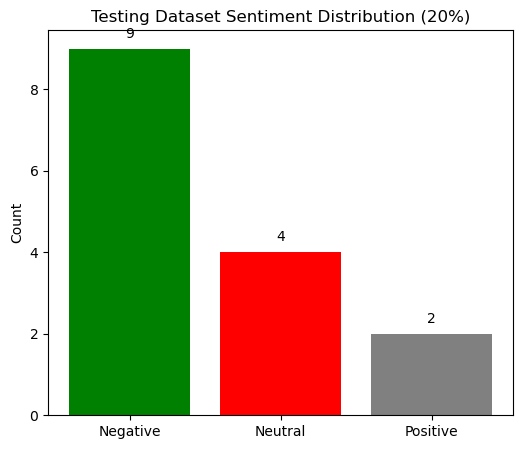

In [1]:
import matplotlib.pyplot as plt

# Simulated Testing Dataset Counts
test_sentiment = ['Negative', 'Neutral', 'Positive']
test_counts = [9, 4, 2]
colors = ['green', 'red', 'gray']

# Plotting
plt.figure(figsize=(6, 5))
bars = plt.bar(test_sentiment, test_counts, color=colors)
plt.title('Testing Dataset Sentiment Distribution (20%)')
plt.ylabel('Count')

# Add count labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.2, int(yval), ha='center', va='bottom')

plt.show()